In [1]:
%load_ext autoreload
%autoreload 2
!cd `pwd`

In [31]:
from itertools import chain

import cv2
import numpy as np

from pipeline.book import Book
from pipeline.lib import showImage

In [3]:
B = Book()

In [14]:
def testLayout(p):
    page = B.process(
        batch=False, pages=None if p is None else f"{p}", doOcr=False, quiet=True
    )
    return page

In [15]:
page = testLayout(132)

  0.00s Batch of 1 pages: 132
  0.00s Start batch processing images
   |     0.62s     1 132.jpg                                    8% - 100%
  0.62s all done
  0.63s all done


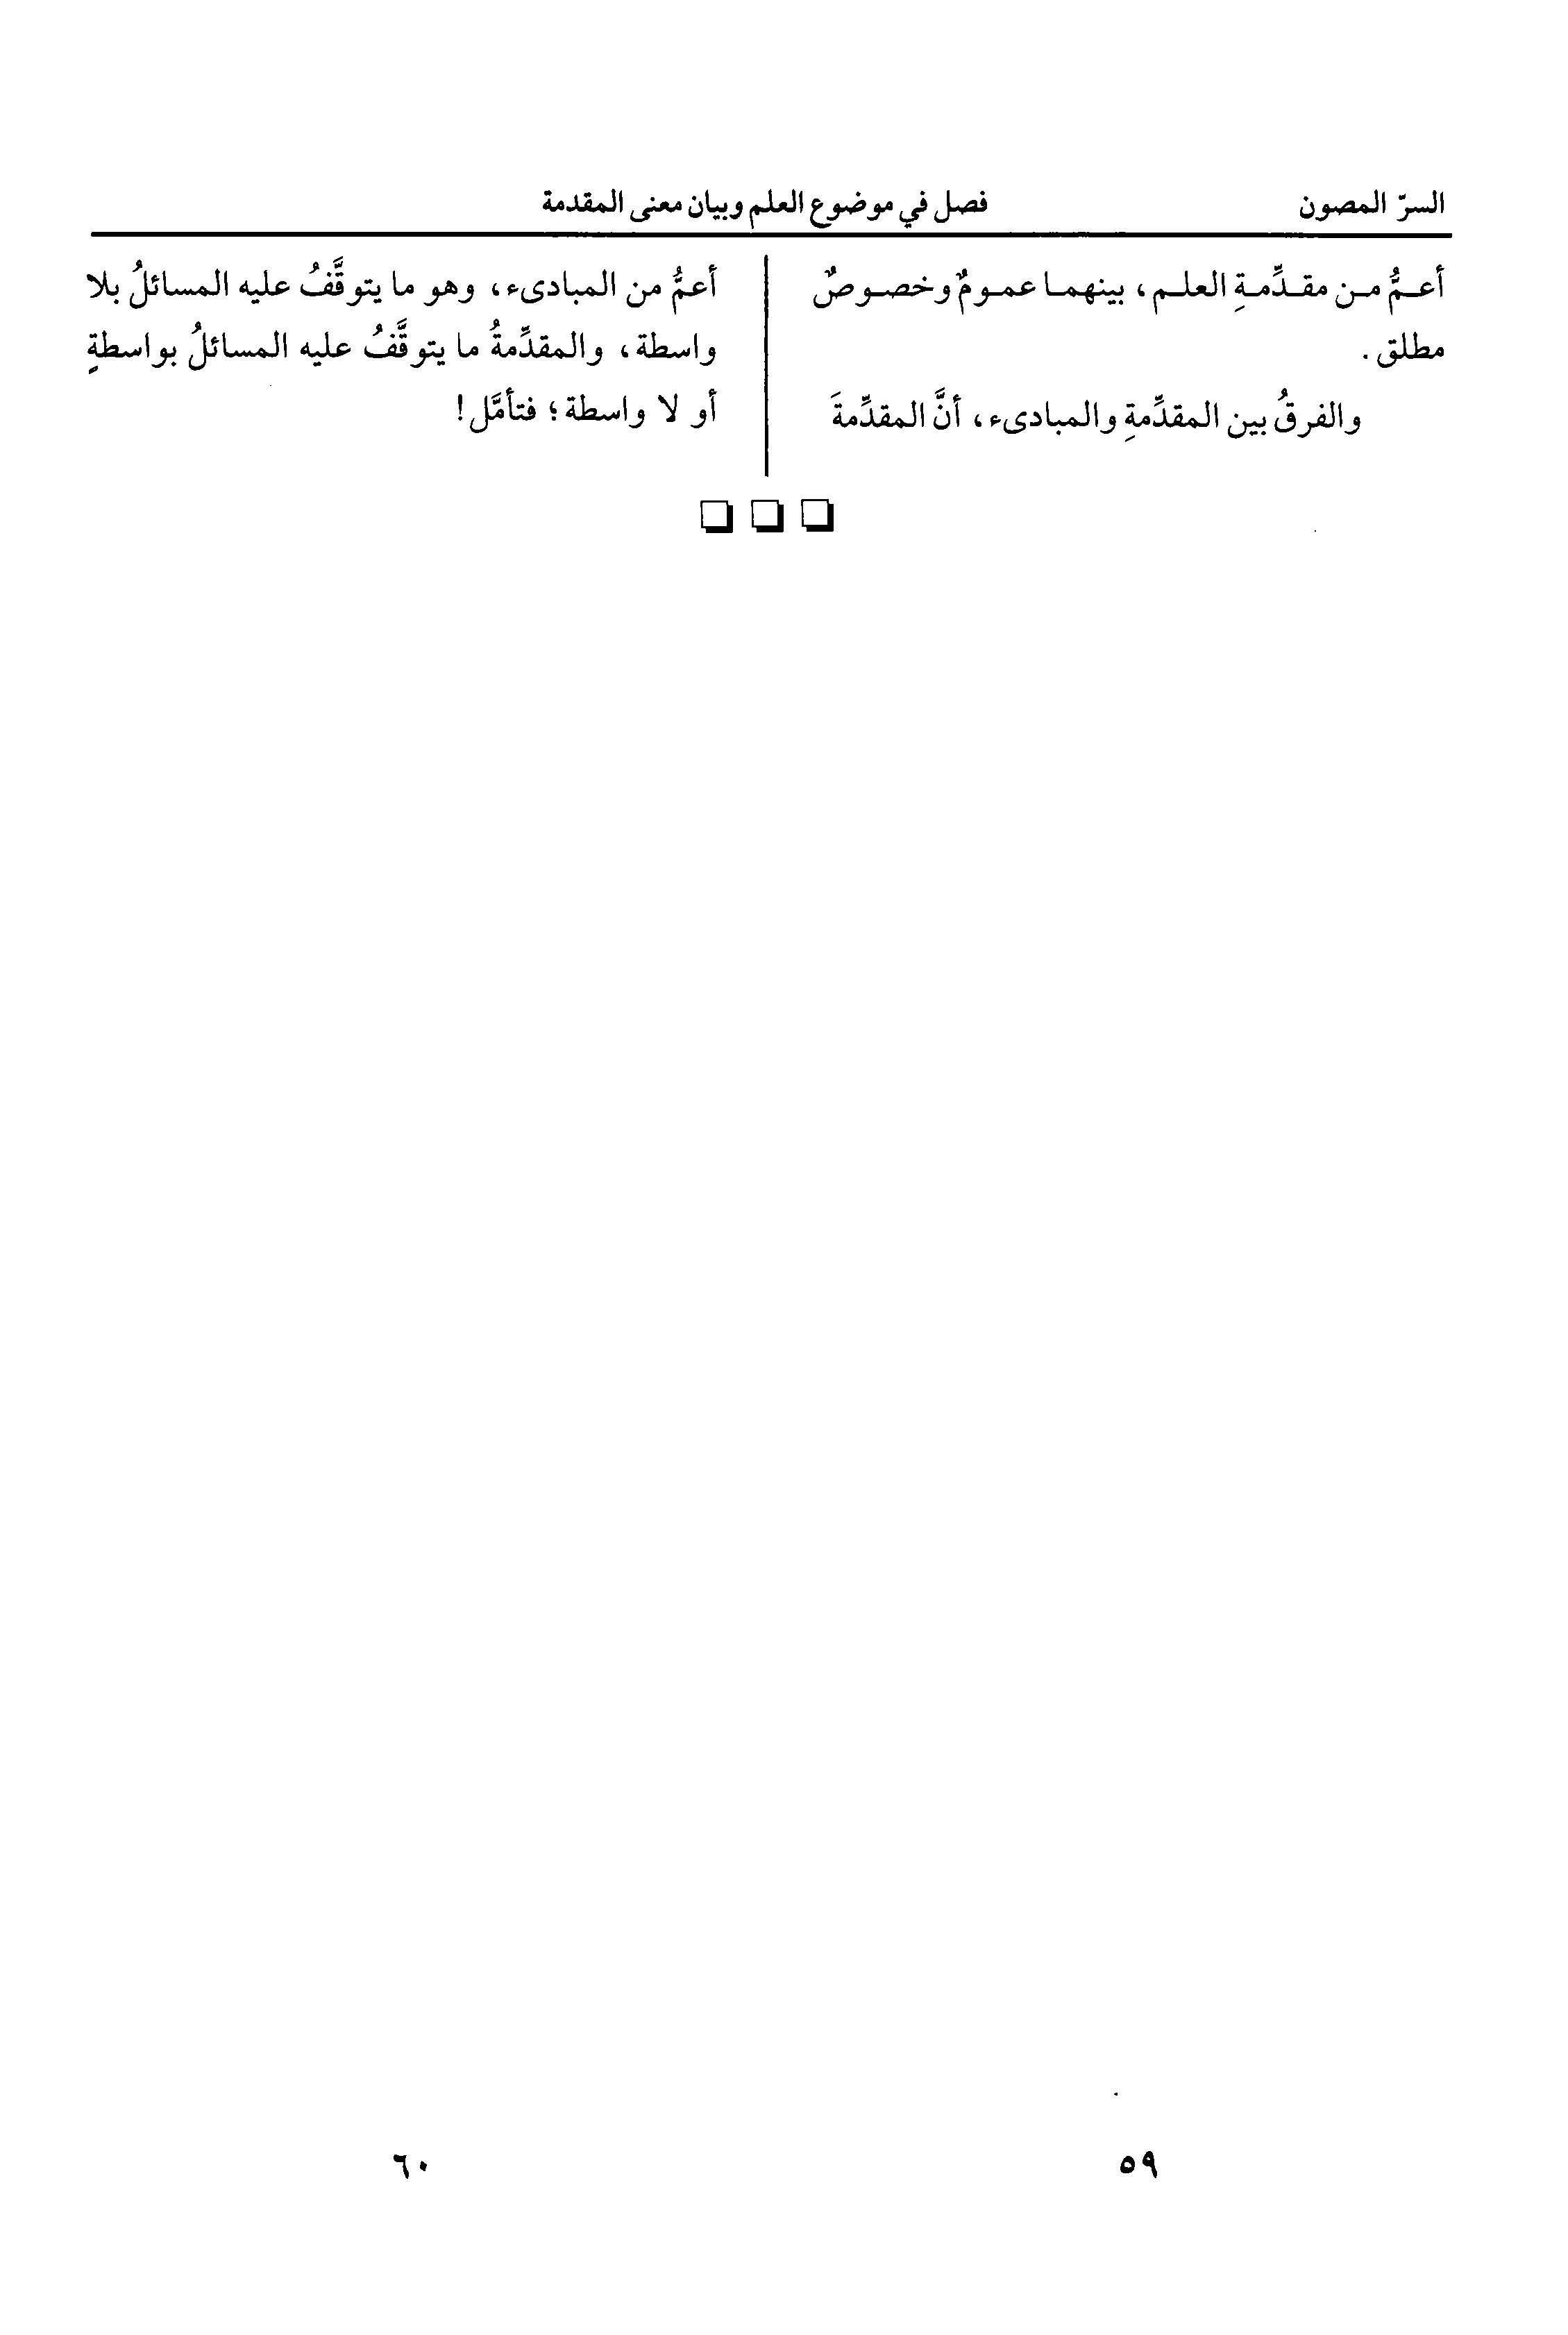

In [39]:
src = page.stages['normalized']
srcC = page.stages['normalizedC']
showImage(srcC)

H 451 11 0
V 67 16 0


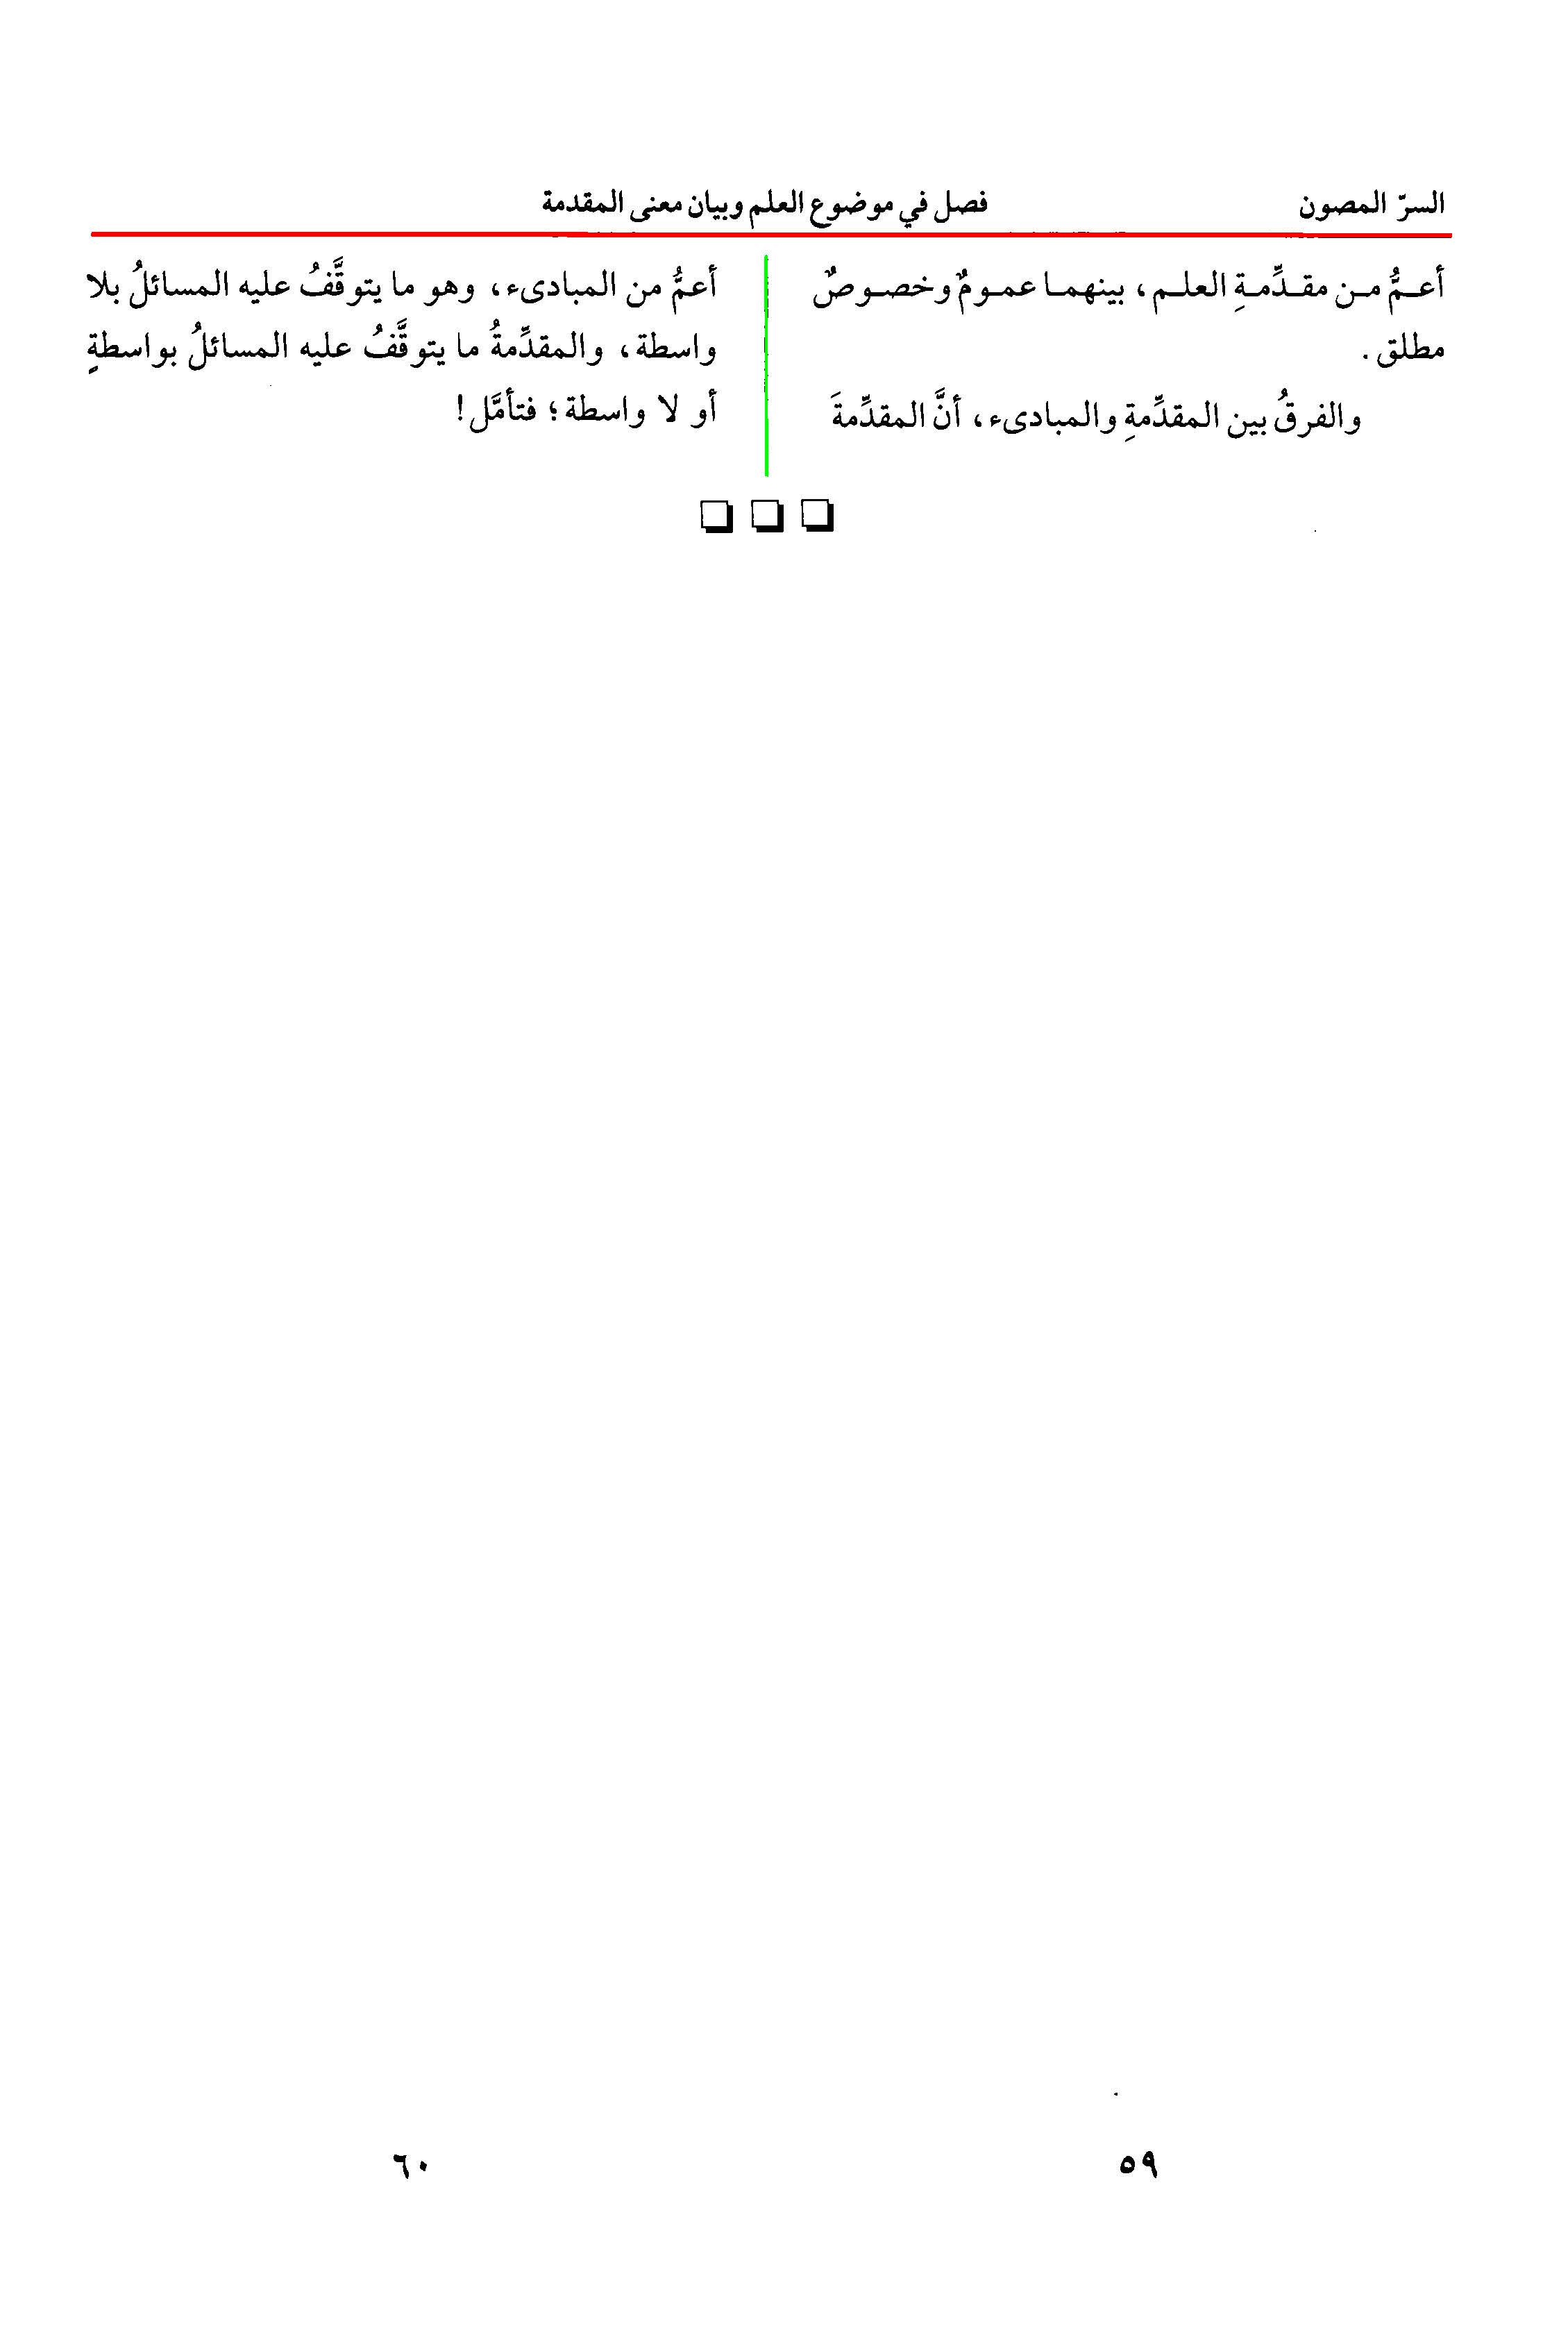

In [54]:
def layout(src, srcC):
    dest = srcC.copy()
    
    blurred = cv2.GaussianBlur(src, (3, 3), 0, 0)
    (th, threshed) = cv2.threshold(
        blurred, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU
    )

    (maxH, maxW) = src.shape[0:2]
    minLenH = maxW // 5
    maxGapH = maxW // 200
    minLenV = maxH // 50
    maxGapV = maxH // 200
    afterGapH = 0
    afterGapV = 0
    print("H", minLenH, maxGapH, afterGapH)
    print("V", minLenV, maxGapV, afterGapV)

    hlines = cv2.HoughLinesP(threshed, 1, np.pi / 180, minLenH, minLineLength=minLenH, maxLineGap=maxGapH)
    for (x1, y1, x2, y2) in chain.from_iterable(hlines):
        if y1 == y2:
            cv2.line(dest, (x1, y1), (x2, y2), (255, 0, 0), 1)
    vlines = cv2.HoughLinesP(threshed, 1, np.pi / 180, minLenV, minLineLength=minLenV, maxLineGap=maxGapV)
    for (x1, y1, x2, y2) in chain.from_iterable(vlines):
        if x1 == x2:
            cv2.line(dest, (x1, y1), (x2, y2), (0, 255, 0), 1)
    showImage(dest)
    
layout(src, srcC)